In [7]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [10]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'


Tentukan jalur ke kumpulan data. Jika Anda tidak menyimpan data di direktori yang sama dengan kode, sesuaikan nama jalur

In [11]:
AIRLINE_STATS_CSV = DATA /  'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# Estimate of Location

## Example: Location Estimates of Population and Murder Rates

In [12]:
# Tabel 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Hitung mean, mean yang dipangkas, dan median untuk Populasi. Untuk mean dan median kita dapat menggunakan metode pandas dari data frame. Rata-rata yang dipangkas membutuhkan fungsi trim_mean di scipy.stats.

In [13]:
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())

6162876.3


In [16]:
print(trim_mean(state['Population'], 0.1))

4783697.125


Rata-rata tertimbang tersedia dengan numpy. Untuk median tertimbang, kita dapat menggunakan paket khusus wquantiles (https://pypi.org/project/wquantiles/).

In [18]:
print(state['Murder.Rate'].mean())

4.066


In [20]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [21]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


## Estimate of Variability

In [22]:
# Tabel 1-2
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Standar deviation

In [24]:
print(state['Population'].std())

6848235.347401142


Rentang interkuartil dihitung sebagai perbedaan dari kuantil 75% dan 25%

In [26]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


Deviasi absolut median dari median dapat dihitung dengan metode di statsmodels

In [30]:
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


## Percentiles and Boxplots

Pandas has the quantile method for data frames

In [31]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [34]:
# Tabel 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


Pandas menyediakan sejumlah plot eksplorasi dasar; salah satunya adalah boxplot

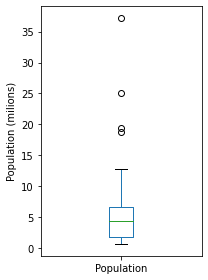

In [35]:
# Figure 1-2
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (milions)')
plt.tight_layout()
plt.show()

## Frequency Table and Histograms

Metode cut untuk data pandas membagi dataset ke dalam bin. Ada sejumlah argumen untuk metode ini. Kode berikut membuat tempat sampah berukuran sama. Metode value_counts mengembalikan tabel frekuensi.

In [36]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [38]:
# Tabel 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'states': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups));

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              states  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

Pandas juga mendukung histogram untuk analisis data eksplorasi.

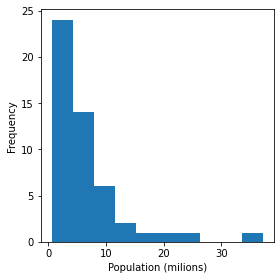

In [43]:
# Figure 1-3
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (milions)')

plt.tight_layout()
plt.show();

## Density Estimates
Density merupakan alternatif dari histogram yang dapat memberikan lebih banyak wawasan tentang distribusi titik data. Gunakan argumen bw_method untuk mengontrol kelancaran kurva kepadatan.

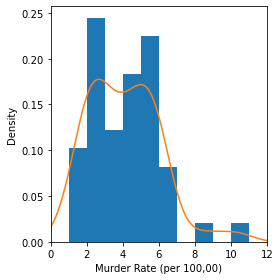

In [44]:
# Figure 1-4
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                   bins=range(1,12), figsize=(4,4))

# Plot functions often take an optional axis (ax) argument, which will cause the plot to be added to same graph.
state['Murder.Rate'].plot.density(ax=ax) 
ax.set_xlabel('Murder Rate (per 100,00)')

plt.tight_layout()
plt.show()

## Exploring Binary and Categorical Data

In [45]:
# Tabel 1- 6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Pandas juga mendukung Blok diagram  untuk menampilkan satu variabel kategoris.

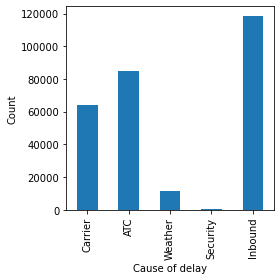

In [47]:
# Figure 1-5
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show();

## Correlation
First read the required datasets

In [60]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
sp500_px.head(10)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.347160,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.231440,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.115720,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.086790,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.144650,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0
1993-02-05,0.0,0.030058,0.093892,0.0,0.0,0.094453,-0.047907,0.046575,0.172760,-0.021298,...,0.0,0.0,-0.332691,0.0,-0.08333,-0.01041,0.015574,-0.75,-0.0625,0.0
1993-02-08,0.0,0.030066,-0.060750,0.0,0.0,-0.113350,-0.011057,0.116436,-0.043190,0.007096,...,0.0,0.0,-0.549670,0.0,-0.08333,0.00000,0.000000,0.00,-0.1250,0.0
1993-02-09,0.0,-0.090190,-0.063521,0.0,0.0,-0.132239,-0.014746,0.069862,-0.115169,0.049691,...,0.0,0.0,0.159119,0.0,-0.04167,-0.02605,0.007782,-0.75,0.0000,0.0
1993-02-10,0.0,0.120257,0.022100,0.0,0.0,0.094453,0.014746,-0.256160,0.014394,0.028385,...,0.0,0.0,0.173580,0.0,0.08334,-0.01562,-0.015564,0.25,0.0625,0.0
1993-02-11,0.0,0.030058,-0.022093,0.0,0.0,-0.018897,0.014746,-0.139724,-0.043190,0.021298,...,0.0,0.0,-0.086790,0.0,0.04166,0.00521,0.000000,0.25,-0.2500,0.0


In [61]:
# Tabel 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates july 2012 thought june 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


Selanjutnya kita fokus pada dana yang diperdagangkan di bursa utama (sektor == 'etf').

In [62]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                   sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Karena banyaknya kolom dalam tabel ini, melihat matriks korelasi tidak praktis dan lebih mudah untuk memplot korelasi sebagai Heat map. Paket _seaborn_ menyediakan implementasi yang mudah untuk Heat Map.

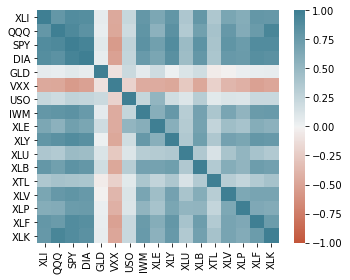

In [63]:
fig , ax = plt.subplots(figsize=(5, 4))
ax  = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

Heat Map di atas berfungsi ketika Anda memiliki warna. Untuk gambar skala abu-abu, seperti yang digunakan dalam buku ini, kita perlu memvisualisasikan arahnya juga. Kode berikut menunjukkan kekuatan korelasi menggunakan elips.

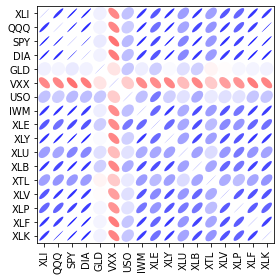

In [75]:
# Figure 1-6
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488'''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()
    
    # xy Lokasi setiap pusat elips
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T
    
    # Tetapkan ukuran relatif sumbu mayor/minor sesuai dengan kekuatan korelasi negatif positif
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()
    
    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)
    
      
    
    # jika data adalah DataFrame, gunakan nama baris/kolom sebagai label centang
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
        
    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

## Scatterplots
Scatterplots sederhana didukung oleh panda. Menentukan penanda sebagai `$\u25EF$` menggunakan lingkaran terbuka untuk setiap titik.

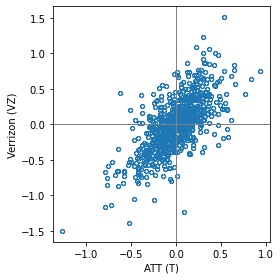

In [76]:
# Figure 1-7
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verrizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_line1)


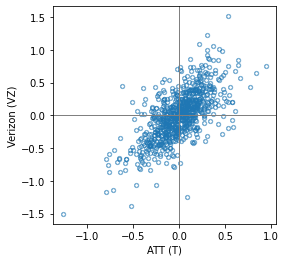

In [77]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

## Exploring Two or More Variables
Muat kumpulan data kc_tax dan filter berdasarkan berbagai kriteria

In [80]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

kc_tax.head()
#print(kc_tax0.shape)

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [81]:
print(kc_tax0.shape)

(432693, 3)


## Hexagonal binning and Contours

### Ploting numeric versus numeric data

Jika jumlah titik data semakin besar, scatter plot tidak akan berarti lagi. Di sini metode yang memvisualisasikan kepadatan lebih berguna. Metode `hexbin` untuk bingkai data panda adalah salah satu pendekatan yang ampuh.

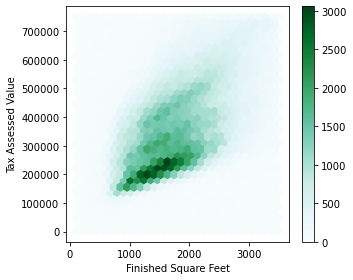

In [83]:
# Fig 1-8
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                            gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

Kdeplot seaborn adalah perpanjangan dua dimensi dari plot kepadatan. Perhitungan densitas 2D untuk dataset lengkap membutuhkan waktu beberapa menit. Cukup membuat visualisasi dengan sampel kumpulan data yang lebih kecil. Dengan 10.000 titik data, membuat grafik hanya membutuhkan beberapa detik. Sementara beberapa detail mungkin hilang, bentuk keseluruhannya tetap terjaga.

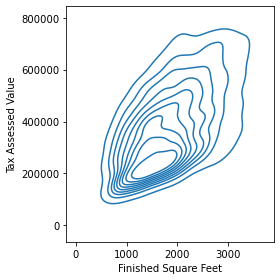

In [86]:
# Fig 1-9
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## Two Categorical Variables
Load the `lc_loans` dataset

In [92]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
lc_loans.head(10)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
5,Fully Paid,A
6,Current,C
7,Fully Paid,E
8,Charged Off,F
9,Charged Off,B


In [91]:
# Tabel 1-8(1)
# The margins keyword argument will add the column and row sums.
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                               aggfunc=lambda x: len(x), margins=True)

print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [95]:
# Tabel 1-8(2)
df = crosstab.copy().loc['A':'G',:]# We create a copy of the pivot table, ignoring the column sums.
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)# We divide the rows with the row sum.
df['All'] = df['All'] / sum(df['All']) # We divide the 'All' column by its sum.
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## Categorical and Numeric Data

Pandas boxplots a column can be grouped by a different column

In [100]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head(10)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
5,6.163889,3.225000,0.975000,American
6,7.744161,10.642251,1.460722,American
7,9.070175,8.078947,0.728070,American
8,10.406593,8.164835,0.838828,American
9,9.769784,5.971223,0.712230,American


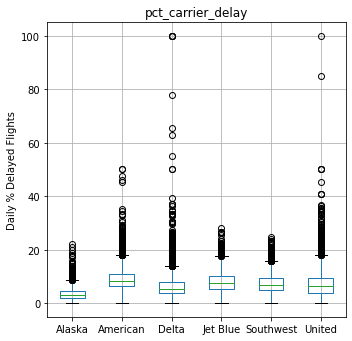

In [99]:
# Figure 1-10
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                          figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

Pandas also support a variation of boxplots called violinplot

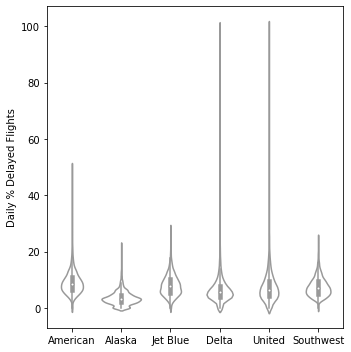

In [102]:
# Figure 1-11
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
              ax=ax, iner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % Delayed Flights')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variables

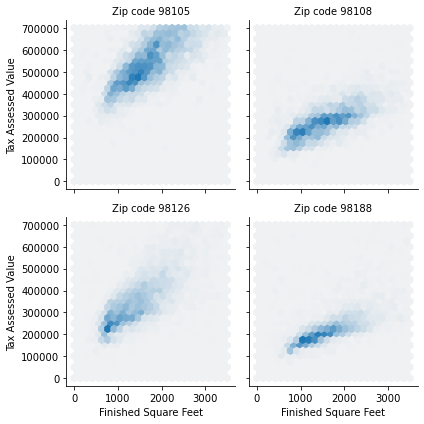

In [105]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

# Use the argument col and row to specify the conditioning variables.For a single conditioning variable,use col together
# with col_warp the faceted graphs into multiple rows
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
         extent=[0, 3500, 0, 700000]) # The map method calls the hexbin function with subset of the original data set for the
                                      # different zip codes.exent defines the limits of the x- and y-axes.
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()